In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

In [2]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
print(twenty_train.target_names)
print(len(twenty_train.data))
print(len(twenty_train.filenames))

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
2257
2257


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(twenty_train.data)
x_train_counts.shape

(2257, 35788)

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer

#Tf fitting
tf_transformer = TfidfTransformer(use_idf= False).fit(x_train_counts)
x_train_tf = tf_transformer.transform(x_train_counts)
# print(x_train_tf.shape )
#Tfidf fitting
tfidf_transformer = TfidfTransformer()
x_train_tfidf = TfidfTransformer().fit_transform(x_train_counts)
# print(x_train_tfidf.shape)

In [5]:
from sklearn.naive_bayes import MultinomialNB # Naive-Bayes

clf_NB = MultinomialNB().fit(x_train_tfidf, twenty_train.target)

In [6]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

twenty_train_data = twenty_train.data
twenty_test_data = twenty_test.data

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score
def calculate_PRF(target, value):
    P = precision_score(target, value, average="macro")
    R = recall_score(target, value, average="macro")
    F = f1_score(target, value, average="macro")
    
    return P,R,F

**# Classifier 1 :- Naive Bayes**

In [11]:
import numpy as np
from sklearn.pipeline import Pipeline

text_clf_NB_using_count = Pipeline([
    ('vect', CountVectorizer( analyzer='word', ngram_range=(1,1))),
    ('clf', MultinomialNB()),
])
text_clf_NB_using_count.fit(twenty_train.data, twenty_train.target)
NB_predicted_train_count = text_clf_NB_using_count.predict(twenty_train_data)
NB_predicted_test_count = text_clf_NB_using_count.predict(twenty_test_data)

print(np.mean(NB_predicted_test_count == twenty_test.target))
# calculate_PRF(twenty_train.target, NB_predicted_train_count)
calculate_PRF(twenty_test.target, NB_predicted_test_count)

In [ ]:
(0.9270013571964841, 0.9254850516394642, 0.9256770417088109) ==> lower_Case - False with Stop_words == 0.9267643142476698
(0.9270013571964841, 0.9254850516394642, 0.9256770417088109) ==> lower_Case - False without Stop_words == 0.9267643142476698

In [30]:
text_clf_NB_using_tf= Pipeline([
    ('vect', CountVectorizer()),
    ('tdidf', TfidfTransformer(use_idf=False)),
    ('clf_NB', MultinomialNB()),
])
text_clf_NB_using_tf.fit(twenty_train.data, twenty_train.target)
NB_predicted_train_tf = text_clf_NB_using_tf.predict(twenty_train_data)
NB_predicted_test_tf = text_clf_NB_using_tf.predict(twenty_test_data)

calculate_PRF(twenty_train.target, NB_predicted_train_tf)
calculate_PRF(twenty_test.target, NB_predicted_test_tf)

0.9267643142476698


(0.8439720444234136, 0.7440764485007785, 0.7352301705502888)

In [10]:
text_clf_NB_using_tfidf= Pipeline([
    ('vect', CountVectorizer()),
    ('tdidf', TfidfTransformer()),
    ('clf_NB', MultinomialNB()),
])
text_clf_NB_using_tfidf.fit(twenty_train.data, twenty_train.target)
NB_predicted_train_tfidf = text_clf_NB_using_tfidf.predict(twenty_train_data)
NB_predicted_test_tfidf = text_clf_NB_using_tfidf.predict(twenty_test_data)

calculate_PRF(twenty_train.target, NB_predicted_train_tfidf)
calculate_PRF(twenty_test.target, NB_predicted_test_tfidf)

(0.8851369174049685, 0.8236200562832392, 0.8326964950510491)

In [11]:
# Accuracy of the classifier - NB
# print(np.mean(NB_predicted_train_count == twenty_train.target))
print(np.mean(NB_predicted_test_count == twenty_test.target))
# print(np.mean(NB_predicted_train_tf == twenty_train.target))
print(np.mean(NB_predicted_test_tf == twenty_test.target))
# print(np.mean(NB_predicted_train_tfidf == twenty_train.target))
print(np.mean(NB_predicted_test_tfidf == twenty_test.target))


0.9340878828229028
0.7669773635153129
0.8348868175765646


In [12]:
from sklearn import metrics

print(metrics.classification_report(twenty_test.target, NB_predicted_test_tfidf, target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



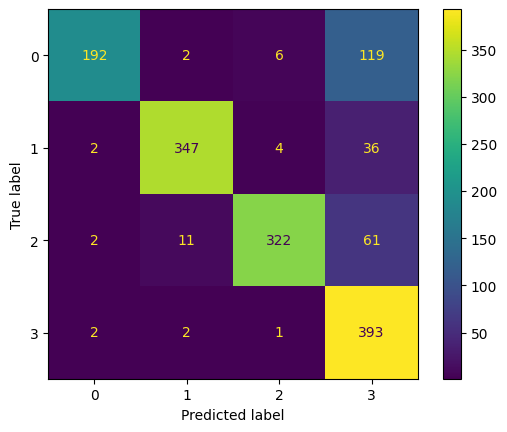

In [13]:
cm = metrics.confusion_matrix(twenty_test.target, NB_predicted_test_tfidf)
metrics.ConfusionMatrixDisplay(cm).plot()

**# Classifier 2 :- SVM**

In [14]:
# Support vector machine(SVM)

from sklearn.linear_model import SGDClassifier

text_clf_SVM_count = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)),
])

text_clf_SVM_count.fit(twenty_train.data, twenty_train.target)
SVM_predicted_train_count = text_clf_SVM_count.predict(twenty_train_data)
SVM_predicted_test_count = text_clf_SVM_count.predict(twenty_test_data)

calculate_PRF(twenty_train.target, SVM_predicted_train_count)
calculate_PRF(twenty_test.target, SVM_predicted_test_count)


(0.8609660341295302, 0.8565344550169616, 0.8549256134594864)

In [15]:
text_clf_SVM_tf = Pipeline([
    ('vect', CountVectorizer()),
    ('tdidf', TfidfTransformer(use_idf=False)),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)),
])

text_clf_SVM_tf.fit(twenty_train.data, twenty_train.target)
SVM_predicted_train_tf = text_clf_SVM_tf.predict(twenty_train_data)
SVM_predicted_test_tf = text_clf_SVM_tf.predict(twenty_test_data)

calculate_PRF(twenty_train.target, SVM_predicted_train_tf)
calculate_PRF(twenty_test.target, SVM_predicted_test_tf)

(0.8565415142776867, 0.8432237801129007, 0.845847919685948)

In [16]:
text_clf_SVM_tfidf = Pipeline([
    ('vect', CountVectorizer()),
    ('tdidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)),
])

text_clf_SVM_tfidf.fit(twenty_train.data, twenty_train.target)
SVM_predicted_train_tfidf = text_clf_SVM_tfidf.predict(twenty_train_data)
SVM_predicted_test_tfidf = text_clf_SVM_tfidf.predict(twenty_test_data)

calculate_PRF(twenty_train.target, SVM_predicted_train_tfidf)
calculate_PRF(twenty_test.target, SVM_predicted_test_tfidf)

(0.9146727810334692, 0.9051336188341744, 0.9073027926736008)

In [17]:
# Accuracy of the classifier - SVM
# print(np.mean(SVM_predicted_train_count == twenty_train.target))
print(np.mean(SVM_predicted_test_count == twenty_test.target))
# print(np.mean(SVM_predicted_train_tf == twenty_train.target))
print(np.mean(SVM_predicted_test_tf == twenty_test.target))
# print(np.mean(SVM_predicted_train_tfidf == twenty_train.target))
print(np.mean(SVM_predicted_test_tfidf == twenty_test.target))


0.8568575233022636
0.8495339547270306
0.9101198402130493


**# Classifier 3 - Random Forest**

In [18]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

text_clf_RF_count = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier()),
])

text_clf_RF_count.fit(twenty_train.data, twenty_train.target)
RF_predicted_train_count = text_clf_RF_count.predict(twenty_train_data)
RF_predicted_test_count = text_clf_RF_count.predict(twenty_test_data)

calculate_PRF(twenty_train.target, RF_predicted_train_count)
calculate_PRF(twenty_test.target, RF_predicted_test_count)


(0.8344054749797936, 0.8000401890161108, 0.8013826947250071)

In [19]:
text_clf_RF_tf = Pipeline([
    ('vect', CountVectorizer()),
    ('tdidf', TfidfTransformer(use_idf=False)),
    ('clf', RandomForestClassifier()),
])

text_clf_RF_tf.fit(twenty_train.data, twenty_train.target)
RF_predicted_train_tf = text_clf_RF_tf.predict(twenty_train_data)
RF_predicted_test_tf = text_clf_RF_tf.predict(twenty_test_data)

calculate_PRF(twenty_train.target, RF_predicted_train_tf)
calculate_PRF(twenty_test.target, RF_predicted_test_tf)

(0.83368442515577, 0.7968876875317374, 0.7985724315756807)

In [20]:
text_clf_RF_tfidf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier()),
])

text_clf_RF_tfidf.fit(twenty_train.data, twenty_train.target)
RF_predicted_train_tfidf = text_clf_RF_tfidf.predict(twenty_train_data)
RF_predicted_test_tfidf = text_clf_RF_tfidf.predict(twenty_test_data)

calculate_PRF(twenty_train.target, RF_predicted_train_tfidf)
calculate_PRF(twenty_test.target, RF_predicted_test_tfidf)

(0.8416045866365391, 0.8054612879645819, 0.8067306328139131)

In [21]:
# Accuracy of the classifier - RF
# print(np.mean(RF_predicted_train_count == twenty_train.target))
print(np.mean(RF_predicted_test_count == twenty_test.target))
# print(np.mean(RF_predicted_train_tf == twenty_train.target))
print(np.mean(RF_predicted_test_tf == twenty_test.target))
# print(np.mean(RF_predicted_train_tfidf == twenty_train.target))
print(np.mean(RF_predicted_test_tfidf == twenty_test.target))

0.8062583222370173
0.8035952063914781
0.8135818908122503


In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__ngram_range' : [(1,1), (1,2)],
    'tfidf__use_idf' : (True, False)
}

gs_clf = GridSearchCV(text_clf_RF_tfidf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])
# twenty_train.target_names[gs_clf.predict(['God is love'])[0]]

gs_clf.best_score_

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

gs_clf.cv_results_

tfidf__use_idf: True
vect__ngram_range: (1, 1)


{'mean_fit_time': array([1.96213613, 3.8418304 , 1.63240976, 2.65160027]),
 'std_fit_time': array([0.1313122 , 0.34793998, 0.03664715, 0.26133356]),
 'mean_score_time': array([0.05892196, 0.20859227, 0.04842248, 0.08820014]),
 'std_score_time': array([0.01253695, 0.08360725, 0.00882021, 0.02430926]),
 'param_tfidf__use_idf': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_vect__ngram_range': masked_array(data=[(1, 1), (1, 2), (1, 1), (1, 2)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)},
  {'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)},
  {'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)},
  {'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}],
 'split0_test_score': array([0.6625, 0.6375, 0.7125, 0.6125]),
 'split1_test_score': array([0.7875, 0.71